In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from instrNoise import *
sns.set(rc={'figure.figsize':(17,9)})

In [10]:
fmin = 1e-4
fmax = 2e-2 
dur = 1e6
df = 1/dur  # frequency interval 

wmin = -1
wmax = 1
nmin = -1
nmax = 1

H0 = 2.2e-18
h = 0.72

In [17]:
def omega_sens(freqs):
    cov_N = aet_noise_spectrum(freqs)
    S1, S2, S3 = cov_N[0,0,:], cov_N[1,1,:], cov_N[2,2,:]
    h_sens = S1**2  # choosing S1 
    return 4/3 * (np.pi/H0)**2 * freqs**3 * h_sens

def primo_gw(f, nhat, what):
    rts = 0.06  # tensor-to-scalar ratio
    g_bbn = 10.75
    gs_bbn = 10.75
    g_eq = 3.3626
    gs_eq = 3.9091
    del_R = 2.25e-9
    z_bbn = 5.9e9 - 1
    kcmb = 0.05
    gamma = ((2.3*10**4))**-1 * (g_bbn/g_eq) * (gs_eq/gs_bbn)**1.3333

    A1 = (del_R**2)*gamma/24
    A2 = (2*np.pi*f/H0) * (1 / (gamma**0.5 * (1 + z_bbn)))
    A3 = (2*np.pi*f/H0) * (0.72/150.)
    alpha_hat = 2 * (3 * what - 1) / (3 * what + 1)

    return rts * (A1 * A2**alpha_hat * A3**nhat)

def generate_freqs(fmin, fmax, df):
    return np.arange(fmin, fmax+df, df)

def logL(freqs, dur, sens, nhat, what):
    '''
    log likelihood for each point in the what vs nhat
    '''
    gw = np.array([])
    
    for f in freqs:
        gw = np.append(gw, primo_gw(f,nhat,what))
    
    log_L = -dur * np.sum(0.5*(h*gw/(h*sens))**2)
    
    print(log_L)
    
    return log_L

def logsumexp(x):
    c = x.max()
    return c + np.log(np.sum(np.exp(x - c)))

In [18]:
%%time
whats = np.arange(wmin, wmax, .2)
nhats = np.arange(nmin, nmax, .2)
freqs = generate_freqs(fmin, fmax, df)
sens = omega_sens(freqs)

data = pd.DataFrame(columns=['n','w','ll'])
for w in whats:
    for n in nhats:
        res = logL(freqs, dur, sens, n, w)
        data = data.append({'n':n, 'w':w, 'll':res}, ignore_index=True)

-1.707371199016181e+104
-5.137912082989887e+109
-1.5684004959172544e+115
-4.860503047476708e+120
-1.5307870367403496e+126
-4.9063168177757814e+131
-1.6031696417963623e+137
-5.352753493774594e+142
-1.8314040115583744e+148
-6.4429462322488545e+153
-6.169710481973426e+118
-1.9879839607269773e+124
-6.534368862873764e+129
-2.1963190104960466e+135
-7.571742586215584e+140
-2.686920258479742e+146
-9.853673936388413e+151
-3.7495323632199463e+157
-1.4856871724768332e+163
-6.144410283762617e+168
-1.104424930206523e+156
-5.118346498648629e+161
-2.45883152613249e+167
-1.2185082559194783e+173
-6.1983951085383216e+178
-3.2217205394938378e+184
-1.7042123102744248e+190
-9.144277905441982e+195
-4.963693103702863e+201
-2.7200038084443465e+207


<ipython-input-17-10737ff67f81>:37: RuntimeWarning: overflow encountered in square
  log_L = -dur * np.sum(0.5*(h*gw/(h*sens))**2)


-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-5.319226221870532e-80
-4.0028006194201505e-75
-3.020252353670967e-70
-2.2856176790063257e-65
-1.7353189719259564e-60
-1.3222840212526962e-55
-1.0116212372650232e-50
-7.774366998563668e-46
-6.004897229235558e-41
-4.664646191196157e-36
-2573982.6539895115
-358565513120.54767
-5.240270186237395e+16
-8.037933689533024e+21
-1.29395238177068e+27
-2.184679515640148e+32
-3.863379255534847e+37
-7.14136443304626e+42
-1.376292689395763e+48
-2.757223090771538e+53
-6.3374194931078006e+29
-1.2457339016430615e+35
-2.5415152718592245e+40
-5.364684387536984e+45
-1.168007056104256e+51
-2.6154774273345007e+56
-6.008062928432354e+61
-1.4125443496250975e+67
-3.392286907052832e+72
-8.307486715752855e+77
-6.010141667843829e+40
-1.324106419396239e+46
-2.997015885082944e+51
-6.952009567712585e+56
-1.649102850947518e+62
-3.9929353931831535e+67
-9.852708304872519e+72
-2.4743296688998767e+78
-6.317032457029694e+83
-1.6380242461136657e+89
-1.3254583646765763e+47
-

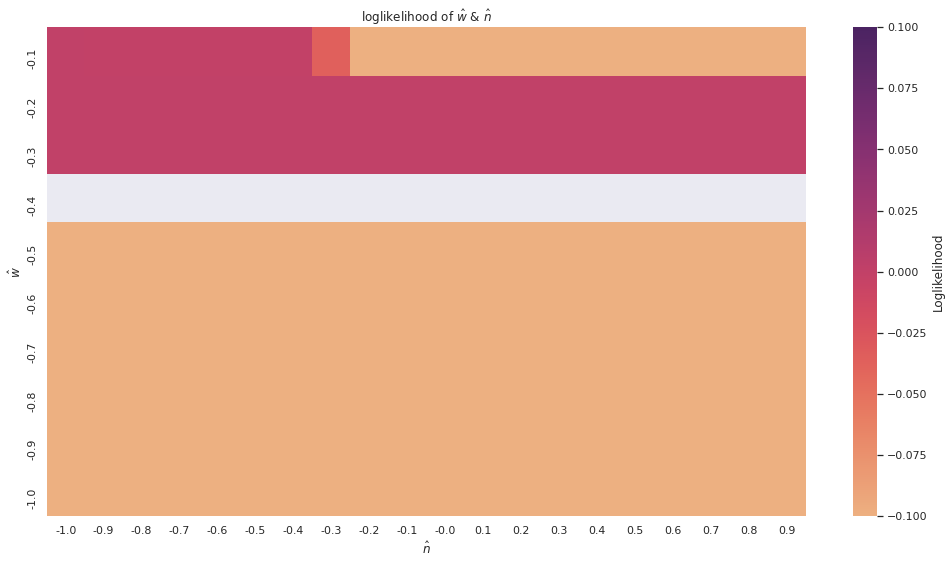

In [5]:
table = data.pivot('w', 'n', 'll')
ax = plt.axes()
sns.heatmap(table,
            xticklabels=table.columns.values.round(2),
            yticklabels=table.index.values.round(2),
            ax=ax,
            cbar_kws={'label': 'Loglikelihood'},
            cmap='flare')

ax.set_title(r'likelihood of $\hat{w} \ & \ \hat{n}$')
ax.set_xlabel(r'$\hat{n}$')
ax.set_ylabel(r'$\hat{w}$')
ax.invert_yaxis()
plt.show()

In [6]:
table

n,-1.00,-0.98,-0.96,-0.94,-0.92,-0.90,-0.88,-0.86,-0.84,-0.82,...,0.80,0.82,0.84,0.86,0.88,0.90,0.92,0.94,0.96,0.98
w,,,,,,,,,,,,,,,,,,,,,
-1.00,-7.848403e-57,-2.645680e-56,-8.958450e-56,-3.046897e-55,-1.040859e-54,-3.571120e-54,-1.230427e-53,-4.256952e-53,-1.478692e-52,-5.156226e-52,...,-3.548533e-06,-1.326827e-05,-4.961720e-05,-1.855674e-04,-6.940984e-04,-2.596508e-03,-9.714187e-03,-3.634715e-02,-1.360130e-01,-5.090210e-01
-0.98,-7.694532e-56,-2.629614e-55,-9.025619e-55,-3.110978e-54,-1.076721e-53,-3.741451e-53,-1.305108e-52,-4.569374e-52,-1.605467e-51,-5.659905e-51,...,-4.726701e-05,-1.768000e-04,-6.613866e-04,-2.474438e-03,-9.258588e-03,-3.464647e-02,-1.296637e-01,-4.853132e-01,-1.816641e+00,-6.800778e+00
-0.96,-9.136657e-55,-3.165933e-54,-1.101361e-53,-3.845994e-53,-1.347942e-52,-4.740760e-52,-1.672888e-51,-5.921824e-51,-2.102527e-50,-7.486067e-50,...,-7.436531e-04,-2.782608e-03,-1.041309e-02,-3.897193e-02,-1.458708e-01,-5.460440e-01,-2.044228e+00,-7.653717e+00,-2.865868e+01,-1.073198e+02
-0.94,-1.340412e-53,-4.706278e-53,-1.658039e-52,-5.860265e-52,-2.077652e-51,-7.387365e-51,-2.633884e-50,-9.415112e-50,-3.373725e-49,-1.211674e-48,...,-1.404915e-02,-5.258821e-02,-1.968654e-01,-7.370418e-01,-2.759662e+00,-1.033380e+01,-3.869933e+01,-1.449392e+02,-5.428827e+02,-2.033591e+03
-0.92,-2.478301e-52,-8.805571e-52,-3.137395e-51,-1.120778e-50,-4.013675e-50,-1.440696e-49,-5.182614e-49,-1.868157e-48,-6.747000e-48,-2.441121e-47,...,-3.247429e-01,-1.216000e+00,-4.553729e+00,-1.705453e+01,-6.387786e+01,-2.392756e+02,-8.963621e+02,-3.358185e+03,-1.258233e+04,-4.714684e+04
-0.90,-5.892790e-51,-2.115249e-50,-7.609354e-50,-2.742972e-49,-9.906665e-49,-3.584381e-48,-1.299071e-47,-4.715616e-47,-1.714306e-46,-6.240841e-46,...,-9.382793e+00,-3.514639e+01,-1.316637e+02,-4.932732e+02,-1.848181e+03,-6.925263e+03,-2.595149e+04,-9.725724e+04,-3.645144e+05,-1.366280e+06
-0.88,-1.841464e-49,-6.666189e-49,-2.417185e-48,-8.778408e-48,-3.192667e-47,-1.162747e-46,-4.240080e-46,-1.548059e-45,-5.658407e-45,-2.070455e-44,...,-3.472816e+02,-1.301320e+03,-4.876636e+03,-1.827638e+04,-6.850034e+04,-2.567602e+05,-9.624857e+05,-3.608213e+06,-1.352760e+07,-5.072004e+07
-0.86,-7.751220e-48,-2.825253e-47,-1.031053e-46,-3.767117e-46,-1.377883e-45,-5.045026e-45,-1.849000e-44,-6.782805e-44,-2.490342e-43,-9.150939e-43,...,-1.693802e+04,-6.349179e+04,-2.380148e+05,-8.923215e+05,-3.345562e+06,-1.254431e+07,-4.703851e+07,-1.763963e+08,-6.615363e+08,-2.481110e+09
-0.84,-4.524171e-46,-1.658101e-45,-6.082502e-45,-2.233216e-44,-8.206088e-44,-3.017727e-43,-1.110567e-42,-4.089911e-42,-1.507206e-41,-5.557851e-41,...,-1.124834e+06,-4.217891e+06,-1.581725e+07,-5.931919e+07,-2.224782e+08,-8.344631e+08,-3.130069e+09,-1.174160e+10,-4.404810e+10,-1.652543e+11
